In [3]:
import pandas as pd

# Correct path
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Show first 5 rows
df.head()



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Shape of the dataset (rows, columns)
df.shape  

# Column names
df.columns  

# Data types + non-null counts
df.info()

# Basic stats for numeric columns
df.describe()

# Count churn values
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [5]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check if any missing values appear
df.isnull().sum()


customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
# Drop rows with missing TotalCharges
df = df.dropna(subset=['TotalCharges'])

# Reset index (optional but neat)
df = df.reset_index(drop=True)

# Check new shape
df.shape


(7032, 21)

C:\Users\hrith\AppData\Local\Temp\ipykernel_11376\1242243989.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


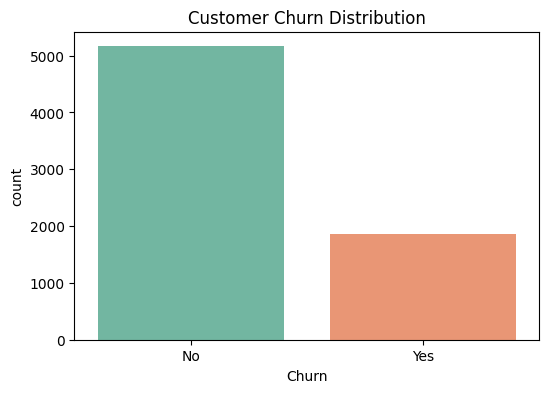

Churn
No     73.421502
Yes    26.578498
Name: proportion, dtype: float64


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot churn distribution
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title("Customer Churn Distribution")
plt.show()

# Percentage of churn
churn_percent = df['Churn'].value_counts(normalize=True) * 100
print(churn_percent)


The dataset shows a clear class imbalance, with 73.4% of customers being retained ("No" churn) and 26.6% churning ("Yes").

This imbalance is a crucial finding that needs to be addressed during the modeling phase to avoid building a biased model.

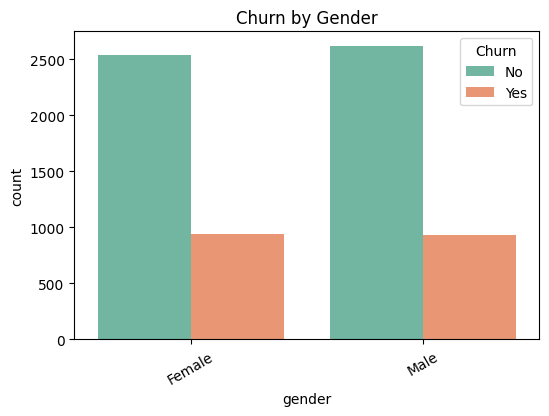

In [17]:
# Churn by Gender
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title("Churn by Gender")
plt.xticks(rotation=30)
plt.show()


Insight: Churn by Gender
The chart comparing churn rates between genders shows that the proportion of churned customers is very similar for both Female and Male customers.
 This indicates that gender is not a strong predictor of churn for this telecommunications company.

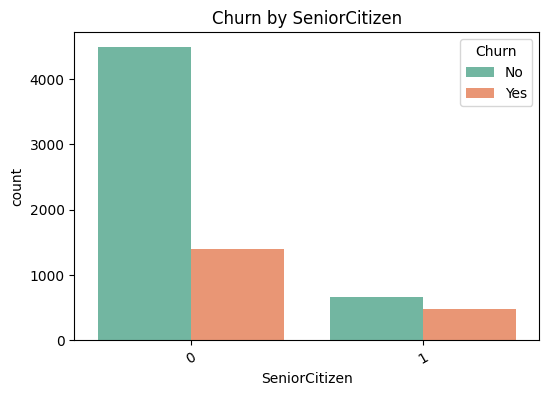

In [18]:
# Churn by SeniorCitizen
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')
plt.title("Churn by SeniorCitizen")
plt.xticks(rotation=30)
plt.show()

Churn by Senior Citizen
Insight: A larger proportion of senior citizens (1) have churned compared to non-senior citizens (0).
This suggests that age is a relevant factor, and the company may need to investigate why their services are less appealing to this demographic.

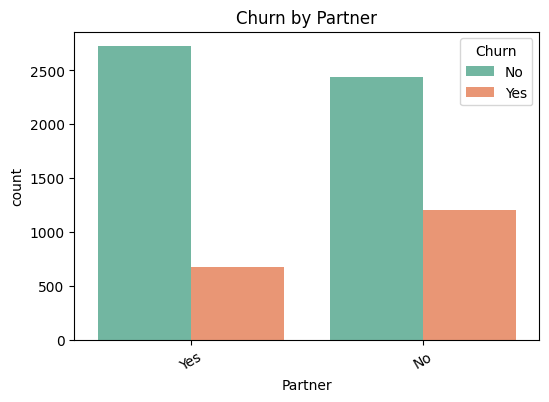

In [19]:
# Churn by Partner
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set2')
plt.title("Churn by Partner")
plt.xticks(rotation=30)
plt.show()

Churn by Partner
Insight: Customers with a partner ("Yes") have a lower churn rate than those without one ("No").
 This implies that customers who are part of a larger household unit tend to be more loyal.

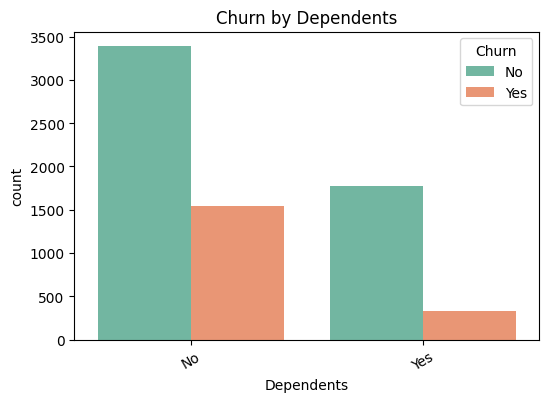

In [20]:
# Churn by Dependents
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set2')
plt.title("Churn by Dependents")
plt.xticks(rotation=30)
plt.show()

Churn by Dependents
Insight: Similar to the Partner variable, customers without dependents have a higher churn rate.
This reinforces the idea that having more people in a household is a positive indicator for customer retention.

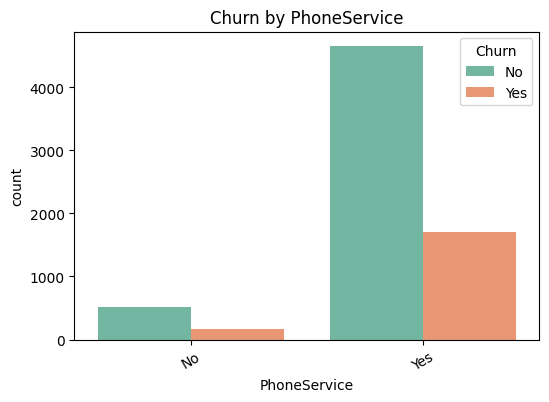

In [21]:
# Churn by PhoneService
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PhoneService', hue='Churn', palette='Set2')
plt.title("Churn by PhoneService")
plt.xticks(rotation=30)
plt.show()

Churn by PhoneService
Insight: The churn rates are very similar for customers with ("Yes") and without ("No") a phone service.
 This indicates that PhoneService is likely not a significant driver of churn.

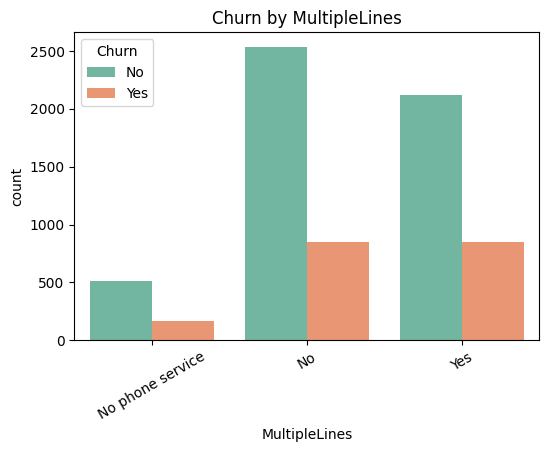

In [22]:
# Churn by MultipleLines
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='MultipleLines', hue='Churn', palette='Set2')
plt.title("Churn by MultipleLines")
plt.xticks(rotation=30)
plt.show()

Churn by MultipleLines
Insight: Customers who have multiple lines ("Yes") show a lower churn rate than those who do not ("No").
This suggests that offering bundled services can help improve customer retention.

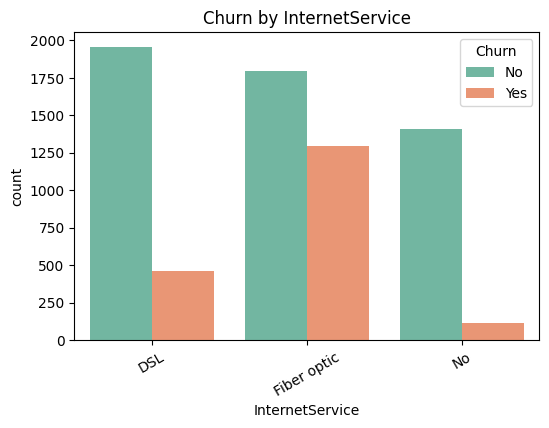

In [23]:
# Churn by InternetService
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='InternetService', hue='Churn', palette='Set2')
plt.title("Churn by InternetService")
plt.xticks(rotation=30)
plt.show()

Churn by InternetService
Insight: Customers with Fiber optic internet service have a dramatically higher churn rate.
 This is a very strong signal and a potential area for immediate business action, as it indicates dissatisfaction with this specific service.

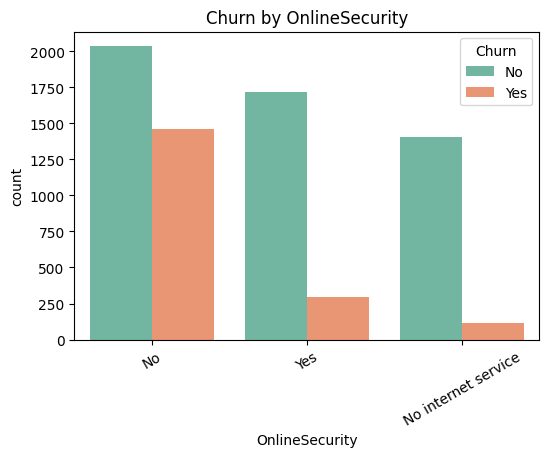

In [24]:
# Churn by OnlineSecurity
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OnlineSecurity', hue='Churn', palette='Set2')
plt.title("Churn by OnlineSecurity")
plt.xticks(rotation=30)
plt.show()

Churn by OnlineSecurity
Insight: Customers who do not have the OnlineSecurity add-on have a much higher churn rate.
This shows that perceived security and protection are key to keeping customers.

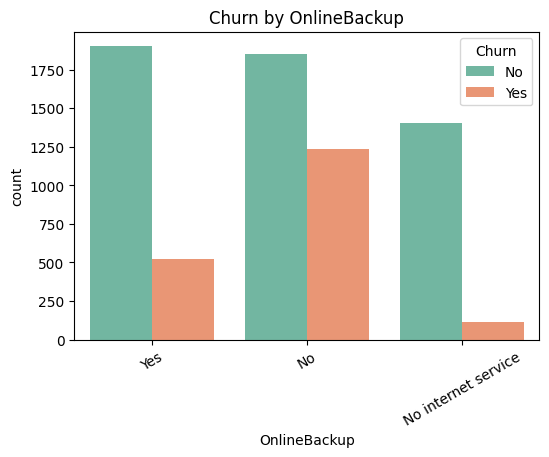

In [25]:
# Churn by OnlineBackup
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='OnlineBackup', hue='Churn', palette='Set2')
plt.title("Churn by OnlineBackup")
plt.xticks(rotation=30)
plt.show()

Churn by OnlineBackup
Insight: The proportion of churned customers is significantly higher among those who do not use the OnlineBackup service.
This is another example of how value-added services contribute to loyalty

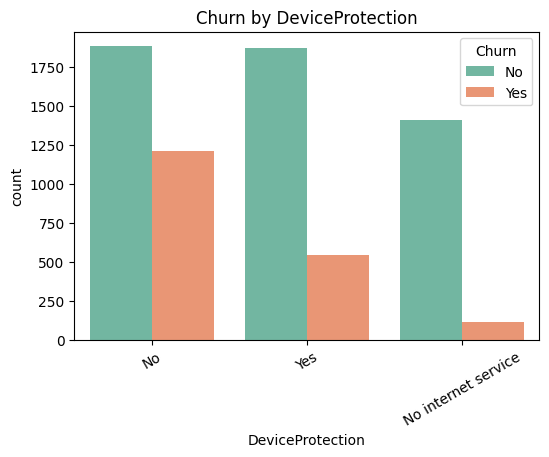

In [26]:
# Churn by DeviceProtection
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='DeviceProtection', hue='Churn', palette='Set2')
plt.title("Churn by DeviceProtection")
plt.xticks(rotation=30)
plt.show()

Churn by DeviceProtection
Insight: Customers without DeviceProtection are more likely to churn.
Like the other security-related services, this seems to be an important feature for customer retention.

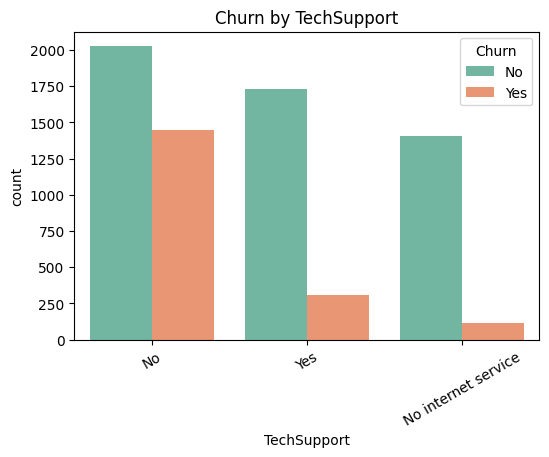

In [27]:
# Churn by TechSupport
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='TechSupport', hue='Churn', palette='Set2')
plt.title("Churn by TechSupport")
plt.xticks(rotation=30)
plt.show()

Churn by TechSupport
Insight: The churn rate is considerably higher for customers who do not have TechSupport.
 This is a clear indicator that the availability of support is a critical factor in preventing churn.

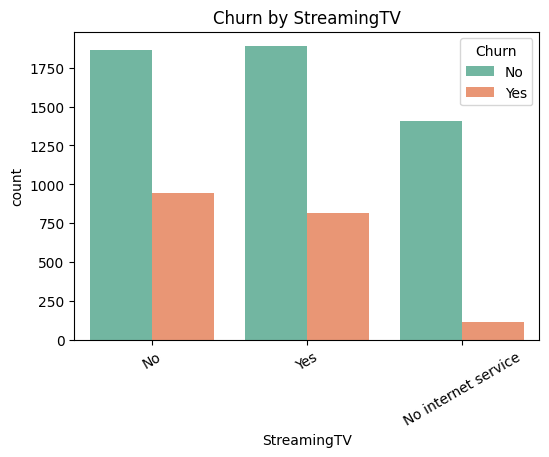

In [28]:
# Churn by StreamingTV
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='StreamingTV', hue='Churn', palette='Set2')
plt.title("Churn by StreamingTV")
plt.xticks(rotation=30)
plt.show()

Churn by StreamingTV
Insight: There is a small difference in churn rates, with customers who do not stream TV being slightly more likely to churn.
This feature's impact is not as strong as the security and support add-ons.

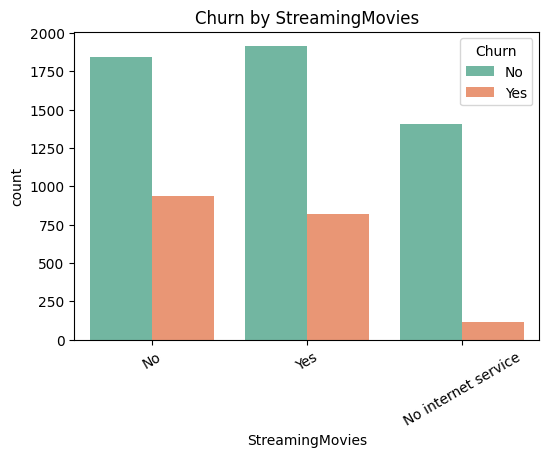

In [29]:
# Churn by StreamingMovies
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='StreamingMovies', hue='Churn', palette='Set2')
plt.title("Churn by StreamingMovies")
plt.xticks(rotation=30)
plt.show()

Churn by StreamingMovies
Insight: Similar to streaming TV, the difference in churn rates is minimal. 
This suggests that streaming movie services, while a factor, are not a primary reason for a customer to leave the company.

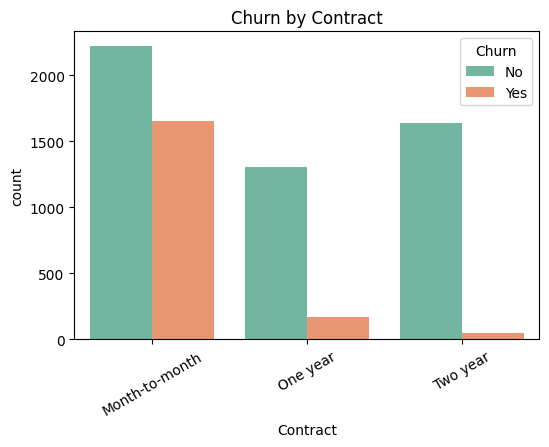

In [30]:
# Churn by Contract
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Contract', hue='Churn', palette='Set2')
plt.title("Churn by Contract")
plt.xticks(rotation=30)
plt.show()

Churn by Contract
Insight: This is one of the most powerful predictors of churn.
Customers on a "Month-to-month" contract churn at a much higher rate. Conversely, customers with one- or two-year contracts are very loyal.

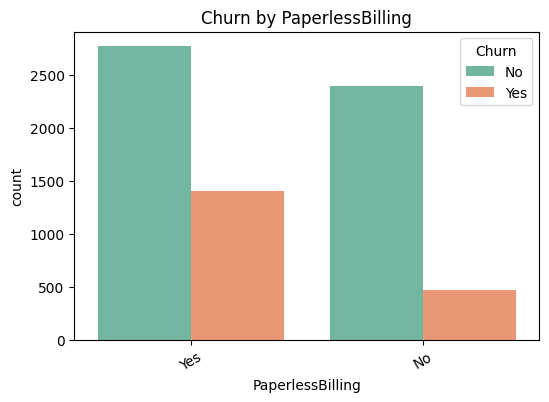

In [31]:
# Churn by PaperlessBilling
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', palette='Set2')
plt.title("Churn by PaperlessBilling")
plt.xticks(rotation=30)
plt.show()

Churn by PaperlessBilling
Insight: The churn rate for customers using PaperlessBilling is higher.
 This could be related to other digital-first services that these customers use, which may have their own churn risks.

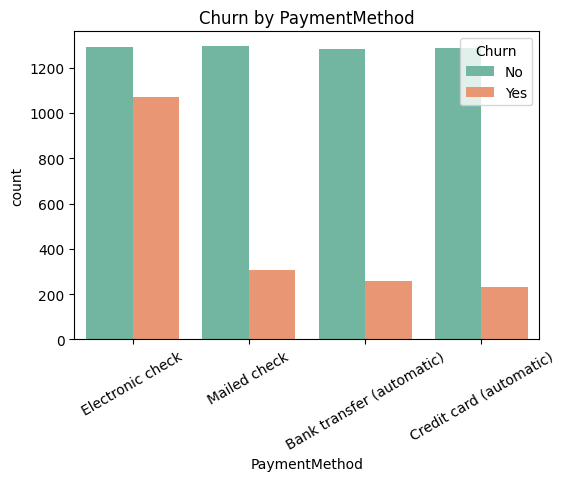

In [32]:
# Churn by PaymentMethod
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='PaymentMethod', hue='Churn', palette='Set2')
plt.title("Churn by PaymentMethod")
plt.xticks(rotation=30)
plt.show()

Churn by PaymentMethod
Insight: The churn rate for customers using "Electronic check" is noticeably higher than for any other payment method. 
This suggests a potential issue or a lack of satisfaction with this specific payment option.

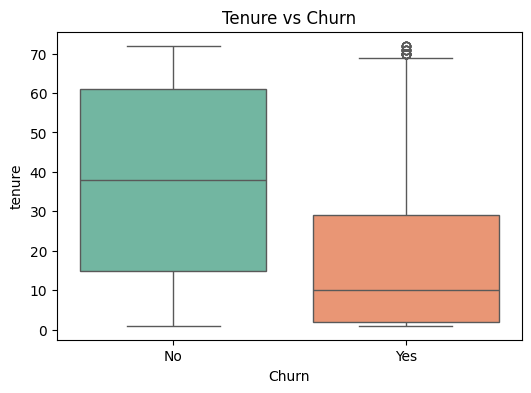

In [33]:
# Plot Churn vs Tenure
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='tenure', hue='Churn', dodge=False, legend=False, palette='Set2')
plt.title("Tenure vs Churn")
plt.show()

Insight: Churned customers have a significantly lower median tenure. 
This confirms that customers are most at risk of churning in their first few months of service.

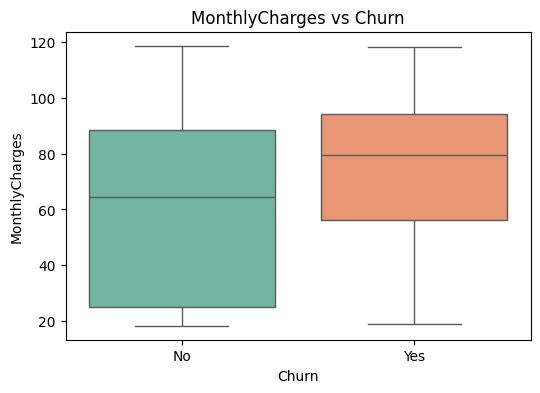

In [34]:
# Plot Churn vs MonthlyCharges
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', hue='Churn', dodge=False, legend=False, palette='Set2')
plt.title("MonthlyCharges vs Churn")
plt.show()

The median MonthlyCharges for churned customers is higher.
 This indicates a strong link between higher costs and customer dissatisfaction.

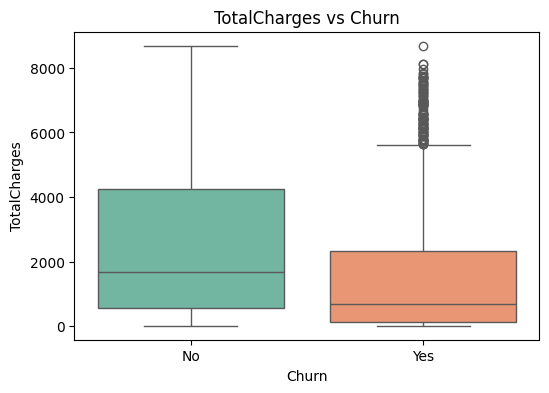

In [35]:
# Plot Churn vs TotalCharges
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='Churn', y='TotalCharges', hue='Churn', dodge=False, legend=False, palette='Set2')
plt.title("TotalCharges vs Churn")
plt.show()

Retained customers have accumulated much higher TotalCharges, which is expected due to their longer tenure.
The boxplot for "Yes" churn is concentrated at the lower end, as these customers left before accumulating large charges.

In [36]:
df[num_cols + ['Churn']].corr(numeric_only=True)

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.246862,0.825880
MonthlyCharges,0.246862,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


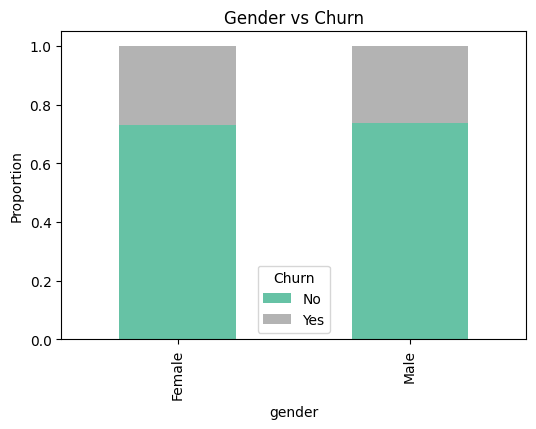

In [37]:
churn_rate_gender = df.groupby('gender')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_gender.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Gender vs Churn")
plt.ylabel("Proportion")
plt.show()

The churn rate is nearly identical for both male and female customers, showing that gender is not a key factor in predicting churn for this dataset.

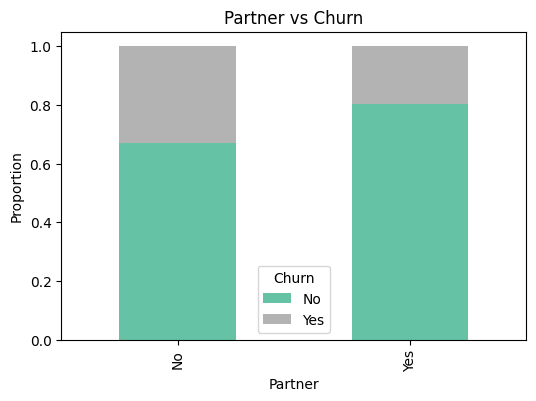

In [38]:
churn_rate_partner = df.groupby('Partner')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_partner.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Partner vs Churn")
plt.ylabel("Proportion")
plt.show()

This chart clearly shows that customers without a partner have a significantly higher churn rate compared to those with a partner. This suggests that customers with family or household connections may be more loyal.

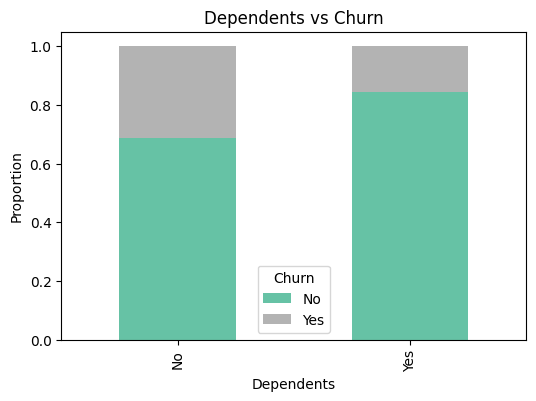

In [39]:
churn_rate_dependents = df.groupby('Dependents')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_dependents.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Dependents vs Churn")
plt.ylabel("Proportion")
plt.show()

Similar to the Partner variable, customers without dependents churn at a much higher rate. This reinforces the finding that a larger household size is a strong indicator of lower churn risk.

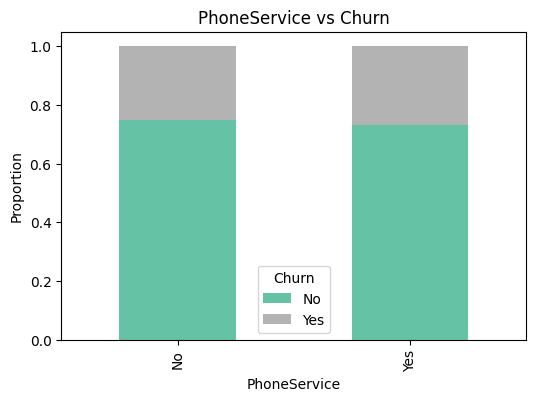

In [40]:
churn_rate_phoneservice = df.groupby('PhoneService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_phoneservice.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("PhoneService vs Churn")
plt.ylabel("Proportion")
plt.show()

This chart shows that the churn rate is very similar for customers with ("Yes") and without ("No") a phone service. This indicates that having a phone service alone is not a strong predictor of churn.

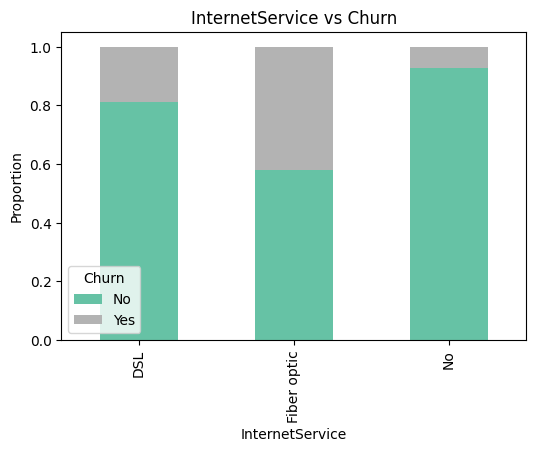

In [41]:
churn_rate_internetservice = df.groupby('InternetService')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_internetservice.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("InternetService vs Churn")
plt.ylabel("Proportion")
plt.show()

This is a major finding. Customers with Fiber optic internet service have a much higher churn rate than those with DSL or no internet service. This suggests potential issues with the fiber optic service itself, making it a critical area for business action.

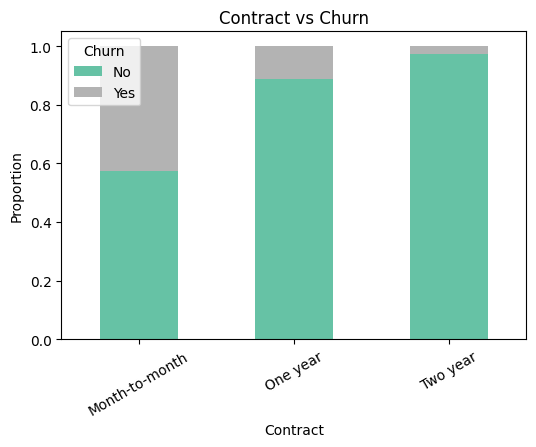

In [42]:
churn_rate_contract = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_contract.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("Contract vs Churn")
plt.ylabel("Proportion")
plt.xticks(rotation=30)
plt.show()

The type of contract is a powerful churn driver. Customers on a "Month-to-month" contract churn at an exceptionally high rate. In contrast, those with "One year" and "Two year" contracts are very loyal, with low churn rates.

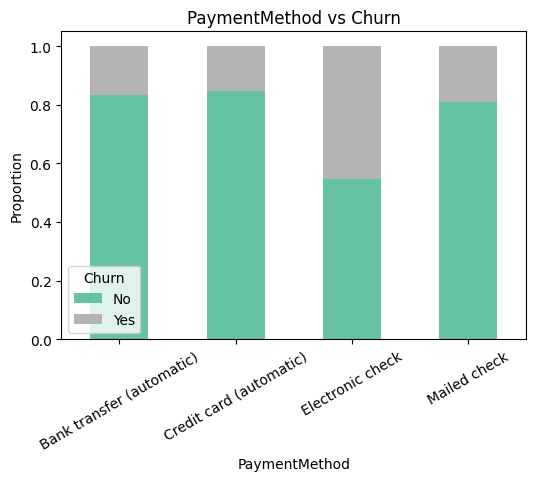

In [43]:
churn_rate_paymentmethod = df.groupby('PaymentMethod')['Churn'].value_counts(normalize=True).unstack().fillna(0)
churn_rate_paymentmethod.plot(kind='bar', stacked=True, figsize=(6,4), colormap='Set2')
plt.title("PaymentMethod vs Churn")
plt.ylabel("Proportion")
plt.xticks(rotation=30)
plt.show()

The "Electronic check" payment method has a significantly higher churn rate than any other method. This is a crucial insight that the company should investigate, as it points to a potential problem with the electronic check payment process or a specific customer segment using it.

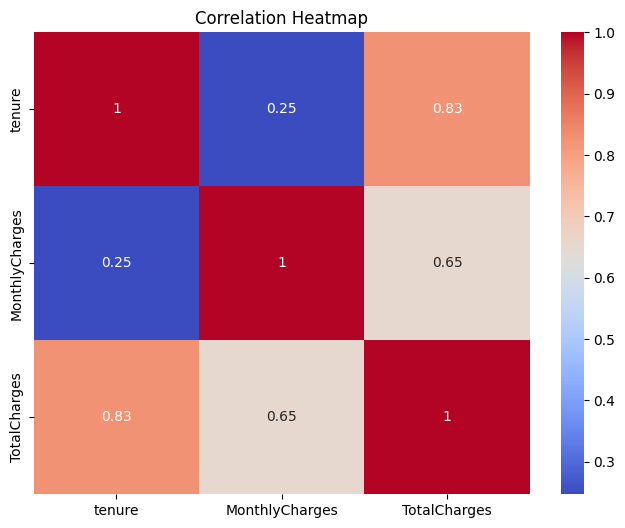

In [44]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Correlation Heatmap
Insight:

tenure and TotalCharges show a very strong positive correlation (0.83), which is logical.

MonthlyCharges and TotalCharges have a strong positive correlation (0.65).

tenure has a negative correlation with the churn_flag (-0.35), meaning as a customer stays longer, their likelihood of churning decreases.

MonthlyCharges has a positive correlation with churn_flag (0.19), suggesting that higher monthly charges lead to a higher likelihood of churn.